# Simulation notebook
This notebook is used for testing the Nile model on the single run *simulation* (not optimization) mode.

In [1]:
import os
import numpy as np
import pandas as pd


from plotting_functions import plot_two_lines_together, line_graph_with_limits

os.chdir('../Model')
from model_nile import ModelNile


In [2]:
model = ModelNile()

In [3]:
pcount = model.overarching_policy.get_total_parameter_count()
random_policy = np.random.rand(pcount)
zero_policy = np.repeat(0, pcount)

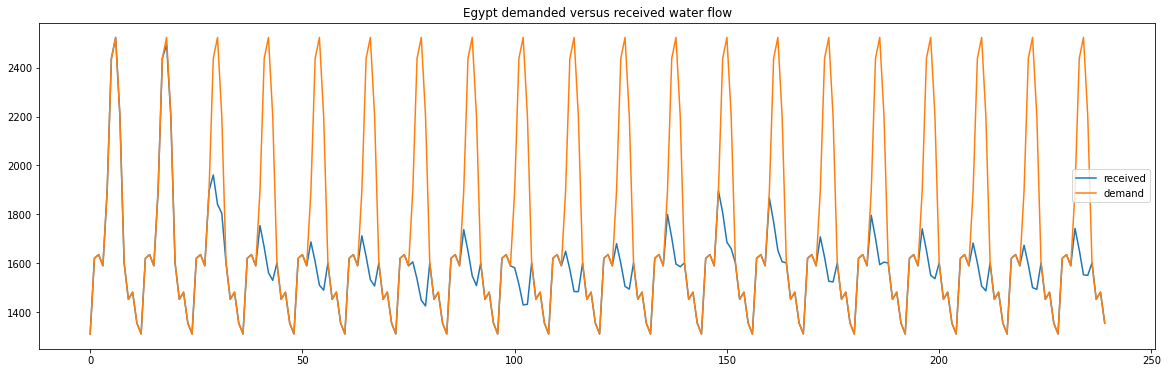

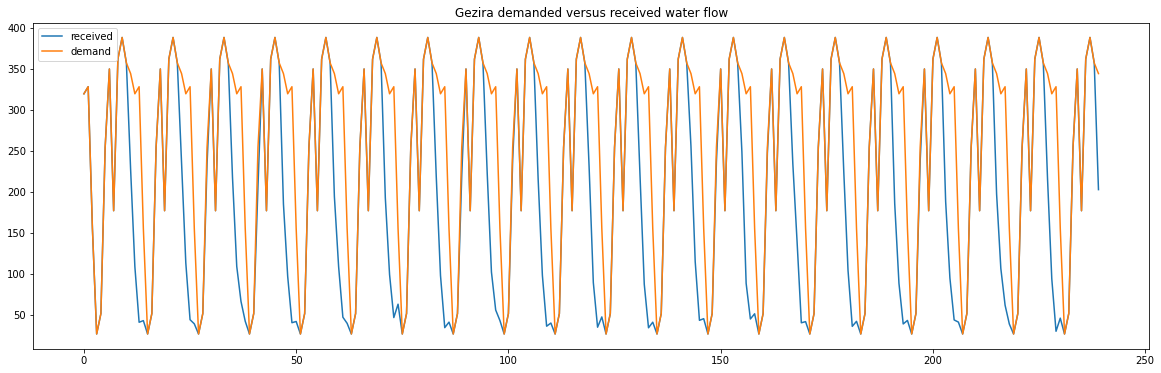

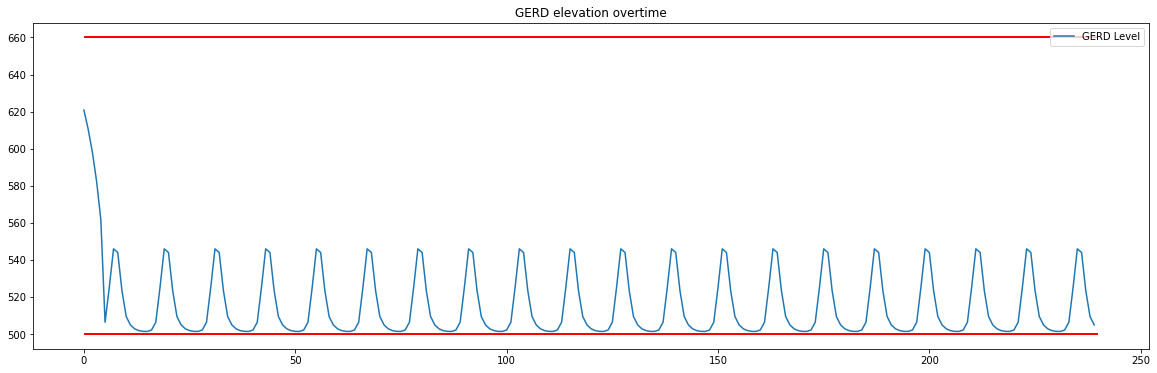

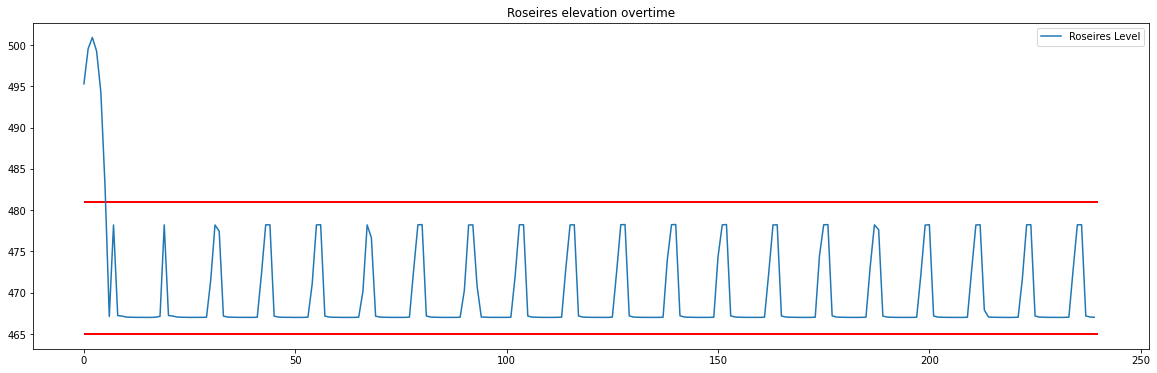

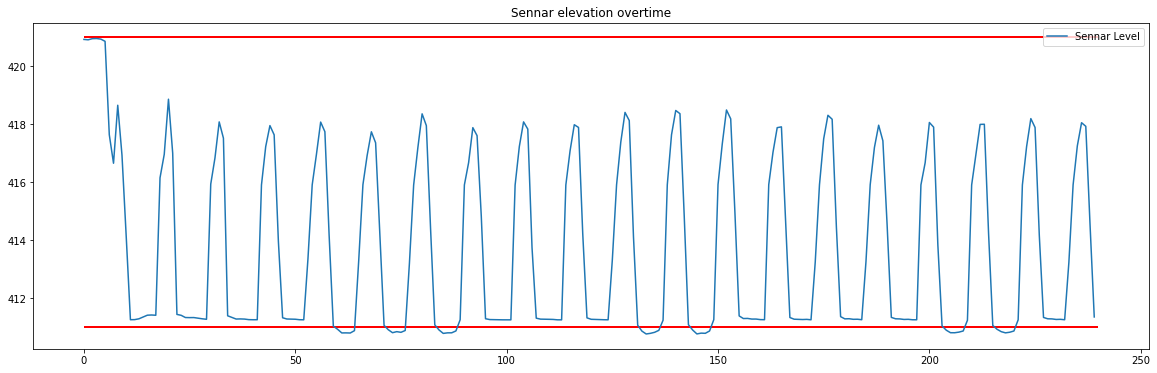

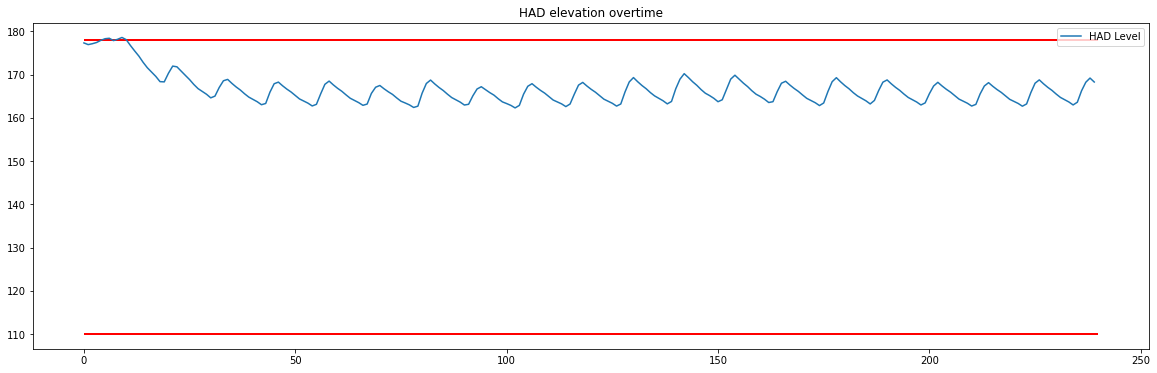

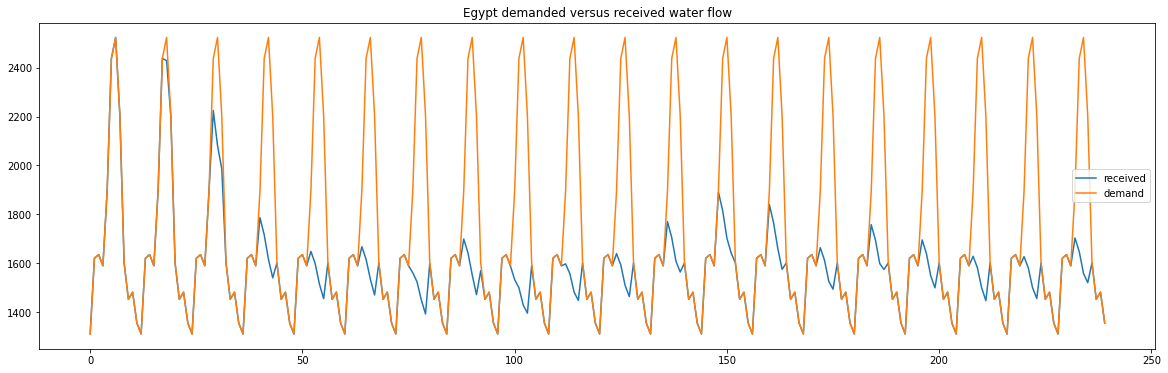

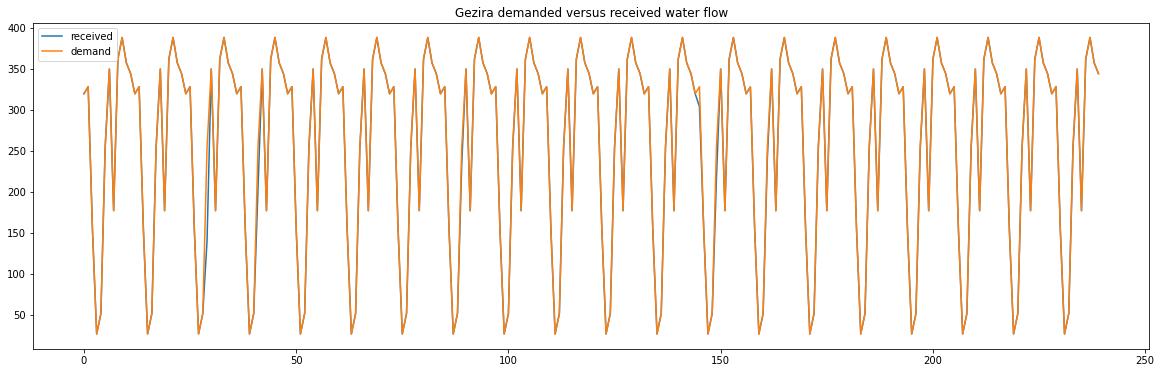

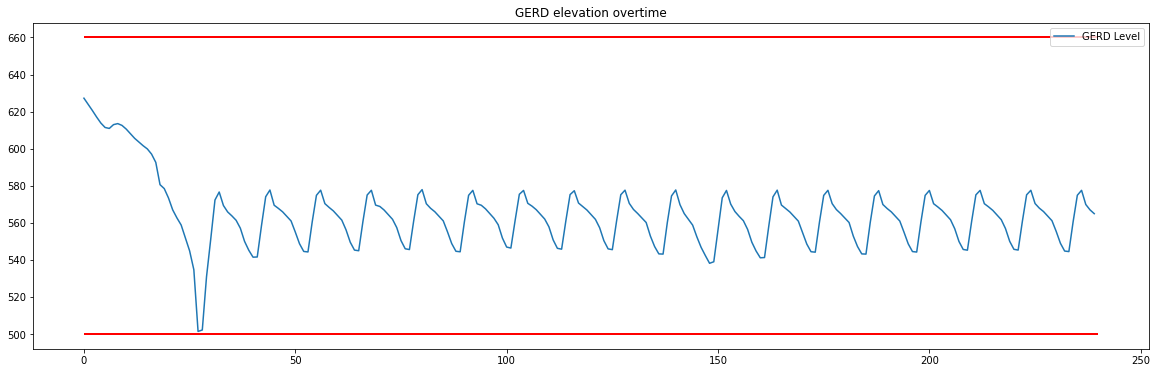

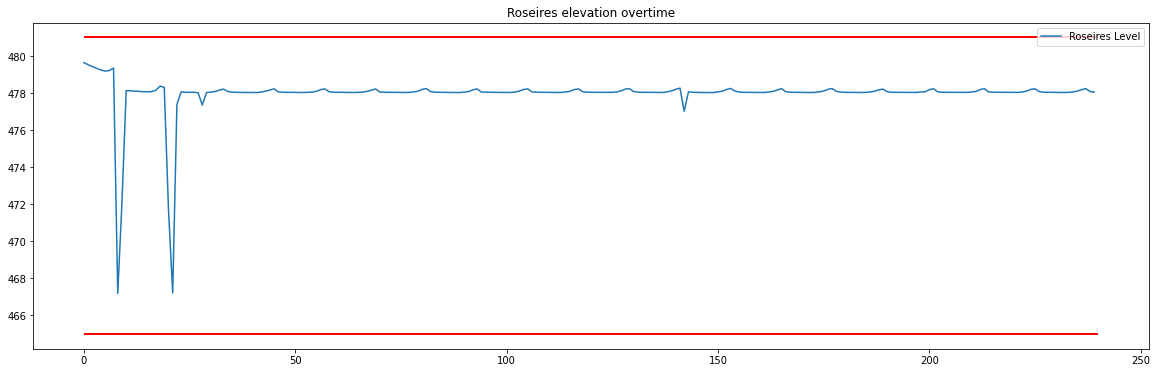

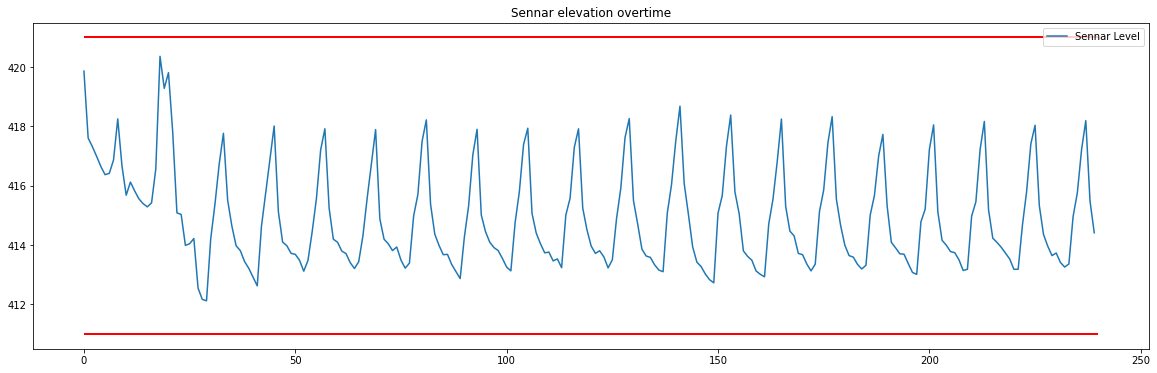

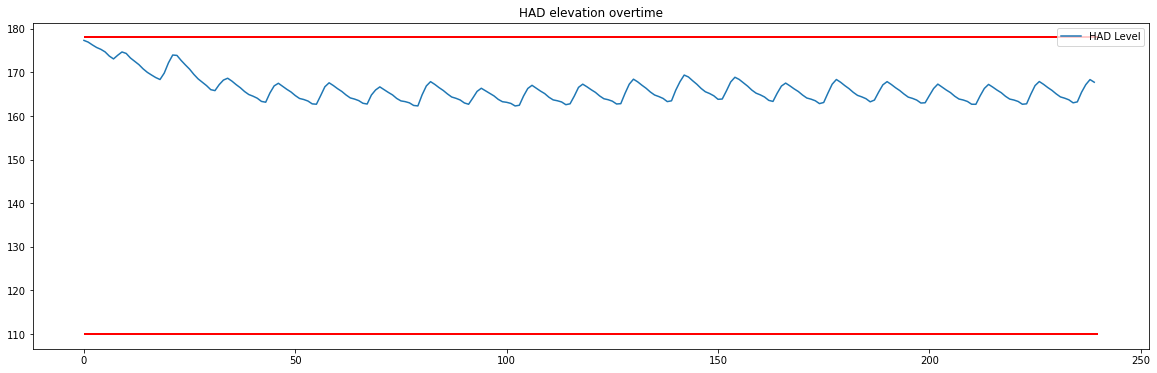

In [4]:
trial_policies = [random_policy, zero_policy]

for policy in trial_policies:
    model.evaluate(policy)
    plot_two_lines_together(model.irr_districts["Egypt"].received_flow, "received",
        model.irr_districts["Egypt"].demand, "demand", "Egypt demanded versus received water flow")
    plot_two_lines_together(model.irr_districts["Gezira"].received_flow, "received",
        model.irr_districts["Gezira"].demand, "demand", "Gezira demanded versus received water flow")
    for dam in model.reservoir_names:
        line_graph_with_limits(model.reservoirs[dam].level_vector, f"{dam} Level",
            model.reservoirs[dam].rating_curve[0,0],
            model.reservoirs[dam].rating_curve[0,-1], f"{dam} elevation overtime")

# Plotting

Below code block will be used to plot some of the actual physical quantities (summary releases across reservoirs, irrigation per catchment, average environmental flows) based on the vectors that were produced by simulation runs: